In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_csv('Dual_System_Normed.csv')

In [3]:
spectra = data.iloc[:, :-1]
label = data.iloc[:, -1]

In [4]:
X_train, X_temp, Y_train, Y_temp = train_test_split(spectra, label, test_size= 0.5, random_state= 69, stratify= label)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size= 0.5, random_state= 69, stratify = Y_temp)

In [5]:
randoForest = RandomForestClassifier(n_estimators= 100, random_state= 69)
randoForest.fit(X_train,Y_train)

RandomForestClassifier(random_state=69)

In [6]:
validation_predict = randoForest.predict(X_val)
validation_proba = randoForest.predict_proba(X_val)

label_indices = [list(randoForest.classes_).index(label) for label in validation_predict]
predicted_val_proba = [validation_proba[i, label_idx] for i, label_idx in enumerate(label_indices)]

print(classification_report(Y_val,validation_predict))
print("Accuracy", accuracy_score(Y_val, validation_predict))

              precision    recall  f1-score   support

P.aeruginosa       1.00      1.00      1.00       375
   S. aureus       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Accuracy 0.9973333333333333


In [7]:
test_predict =randoForest.predict(X_test)

print(classification_report(Y_test,test_predict))
print("Accuracy", accuracy_score(Y_test, test_predict))

              precision    recall  f1-score   support

P.aeruginosa       0.99      0.99      0.99       375
   S. aureus       0.99      0.99      0.99       375

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

Accuracy 0.9946666666666667


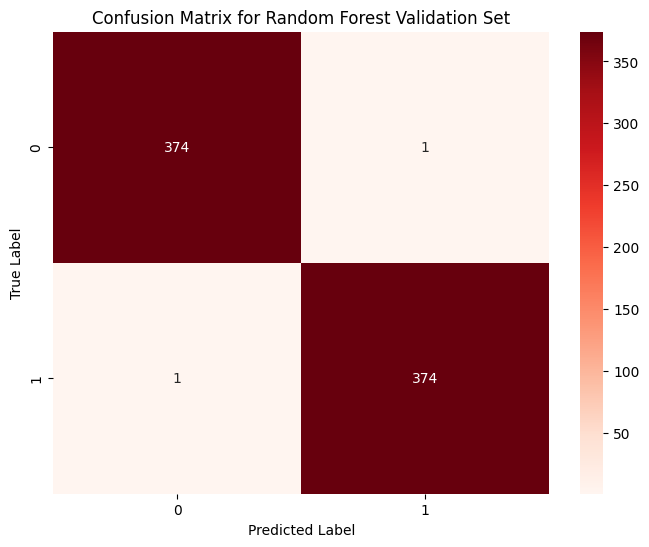

In [8]:
results_df = pd.DataFrame({'Predicted Label': validation_predict, 'Probability of Predicted Label': predicted_val_proba, 'True Label': Y_val})

true_labels = results_df["True Label"]
predicted_labels = results_df['Predicted Label']

confusionMatrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8,6))

sns.heatmap(confusionMatrix, annot= True, fmt ="d", cmap="Reds")

plt.title('Confusion Matrix for Random Forest Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [9]:
unique_labels = np.unique(np.concatenate((true_labels, predicted_labels)))
print("Order of labels in the confusion matrix:", unique_labels)

Order of labels in the confusion matrix: ['P.aeruginosa' 'S. aureus']


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [11]:
unlabeledData = pd.read_csv('Dual_System_Normed_unlabeled.csv')
labelData = pd.read_csv('Dual_System_Normed.csv')

labels = labelData.iloc[:,-1]

In [12]:
pca = PCA(n_components=2)
reducedData = pca.fit_transform(unlabeledData)

In [13]:
kmeans = KMeans(n_clusters= 2, random_state= 69)
cluster_labels = kmeans.fit_predict(reducedData)

c:\Users\elfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<>:13: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\i'
C:\Users\elfo\AppData\Local\Temp\ipykernel_35944\3310443431.py:13: SyntaxWarning: invalid escape sequence '\i'
  legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'$\it{{{label}}}$') for color, label in zip(colors, unique)]


['S. aureus' 'P.aeruginosa']


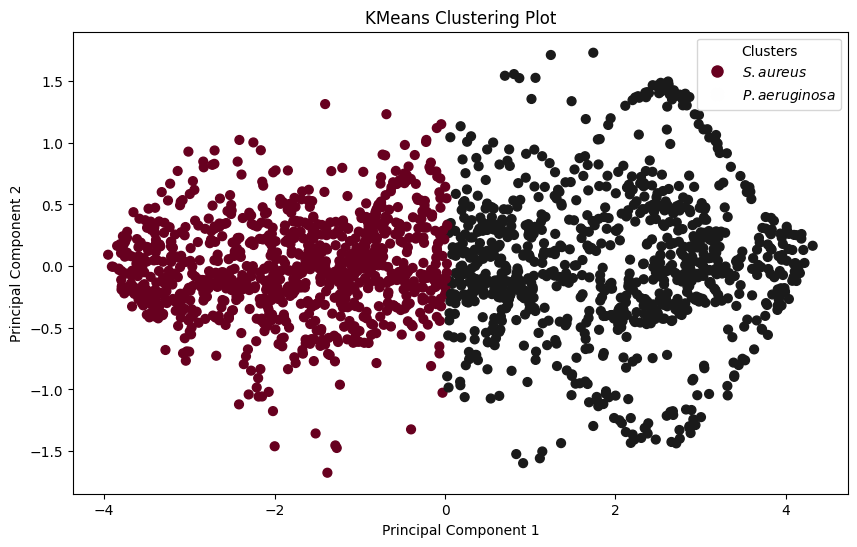

In [14]:
unique = labels.unique()
print(unique)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reducedData[:, 0], reducedData[:, 1], c=cluster_labels, cmap='RdGy', marker='o',  s=40, alpha=1)
plt.title('KMeans Clustering Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

cmap = plt.get_cmap('RdGy')
colors = [cmap(i / len(unique)) for i in range(len(unique))]

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'$\it{{{label}}}$') for color, label in zip(colors, unique)]
plt.legend(handles=legend_handles, title="Clusters")
plt.show()

In [15]:
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
dataset_pca = pd.DataFrame(abs(pca.components_), index = ['PC1', 'PC2'] )


print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.095].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.095].iloc[1]).dropna())

Cumulative variance explained by 2 principal components: 88.24%
As per PC 1:
 Series([], Name: PC1, dtype: float64)


As per PC 2:
 33     0.103206
34     0.150171
35     0.146924
36     0.103663
123    0.095452
170    0.098664
171    0.107887
172    0.116935
173    0.115410
174    0.118413
175    0.114217
176    0.100928
200    0.100677
201    0.116180
202    0.121902
203    0.127427
204    0.120321
205    0.107426
Name: PC2, dtype: float64


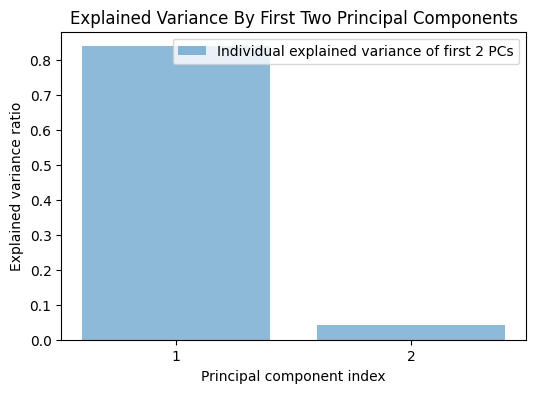

In [16]:
plt.figure(figsize=(6,4))
plt.bar(range(1, 3), pca.explained_variance_ratio_[:2], alpha=0.5, align='center', label='Individual explained variance of first 2 PCs')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks([1, 2])  # Show ticks only for the first two components
plt.legend(loc='best')
plt.title('Explained Variance By First Two Principal Components')
plt.show()

In [17]:
MixedData = pd.read_csv('PAOStaph_Intensities_Normed.csv')

In [18]:
randoForestDual = RandomForestClassifier(n_estimators= 100, random_state= 69)
randoForestDual.fit(spectra,labels)
randoForestDual.predict_proba(MixedData)



#Data im predicting are spetral singals from a mixture sample of Staph and Pseodomonas --> ITS ONLY PREDICTING STAPH

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.87, 0.13],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.94, 0.06],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.87, 0.13],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.98,